In [2]:
!pip install tensorflow

In [3]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_path = '/content/drive/My Drive/Dataset/train'
test_path = '/content/drive/My Drive/Dataset/test'

# Pre Processing Data (Augmentasi dan Normalisasi)

Augmentasi digunakan untuk meningkatkan keragaman data pelatihan, sementara normalisasi dilakukan untuk menyelaraskan nilai piksel gambar antara 0 dan 1.

In [6]:
# Augmentasi untuk data latih
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi
    rotation_range=20,     # Augmentasi: rotasi
    width_shift_range=0.2, # Pergeseran horizontal
    height_shift_range=0.2,# Pergeseran vertikal
    shear_range=0.2,       # Distorsi geser
    zoom_range=0.2,        # Zoom
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'
)

# Augmentasi untuk data uji (tanpa augmentasi, hanya Normalisasi
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
#  Membaca data train dan data test dalam mode grayscale
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),  # Ukuran gambar disesuaikan
    color_mode='grayscale', # Menggunakan grayscale
    batch_size=64, # Ukuran batch
    class_mode='categorical', # Klasifikasi multi-kelas
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 28729 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Model CNN


In [8]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Model CNN dengan Input Layer
model = Sequential([
    Input(shape=(48, 48, 1)),  # Ganti input_shape di sini
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 kelas emosi
])


# Kompilasi

In [9]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Validasi Struktur Data
Memastikan dataset memiliki struktur yang sesuai.

Kelas emosi wajah: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


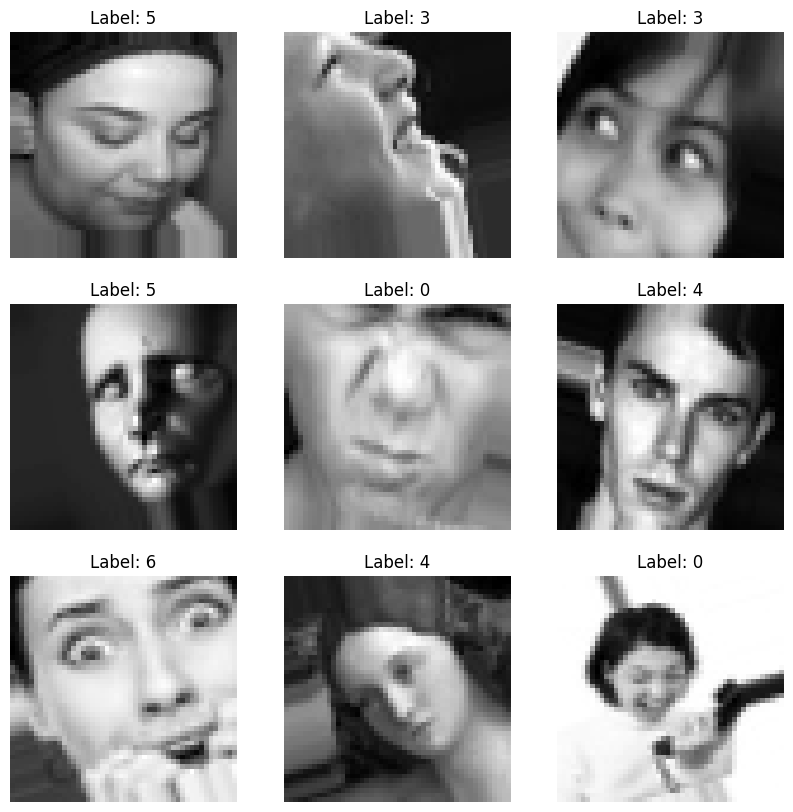

In [10]:
# Periksa jumlah kelas
classes = train_generator.class_indices
print("Kelas emosi wajah:", classes)

# Tampilkan sampel data
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i].reshape(48, 48), cmap='gray')
    plt.title(f"Label: {sample_labels[i].argmax()}")
    plt.axis('off')
plt.show()


# Pelatihan Model

In [11]:
# Pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 7881s 17s/step - accuracy: 0.2354 - loss: 1.8394 - val_accuracy: 0.2475 - val_loss: 1.7907
Epoch 2/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:25 192ms/step - accuracy: 0.2344 - loss: 1.8052

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2344 - loss: 1.8052 - val_accuracy: 0.0000e+00 - val_loss: 2.0991
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 224s 495ms/step - accuracy: 0.2542 - loss: 1.7899 - val_accuracy: 0.2794 - val_loss: 1.7440
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.2812 - loss: 1.7221 - val_accuracy: 0.6000 - val_loss: 1.6124
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 273s 521ms/step - accuracy: 0.2666 - loss: 1.7661 - val_accuracy: 0.3037 - val_loss: 1.7242
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.2500 - loss: 1.8049 - val_accuracy: 0.7000 - val_loss: 1.3355
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 236s 523ms/step - accuracy: 0.2788 - loss: 1.7468 - val_accuracy: 0.3199 - val_loss: 1.6763
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3750 - loss: 1.6644 - val_accuracy: 0.9000 - val_loss: 0.9642
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 251s 522ms/step - accuracy: 0.2963 - loss: 1.7230 - val

# Evaluasi Model

In [12]:
# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

112/112 ━━━━━━━━━━━━━━━━━━━━ 30s 271ms/step - accuracy: 0.3821 - loss: 1.5371
Test Loss: 1.3627172708511353
Test Accuracy: 0.4828403890132904


#Visualisasi Model

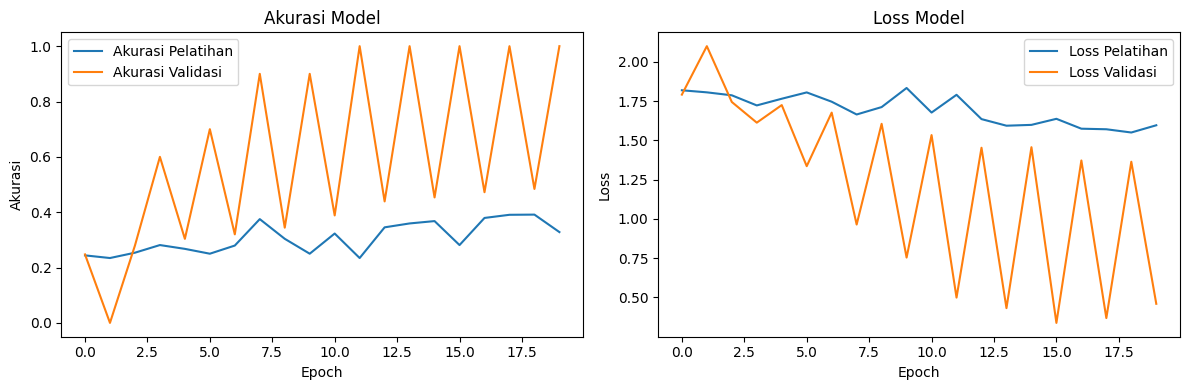

In [13]:
# Plot hasil evaluasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend()
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

#Cek Pembagian Dataset

In [20]:
import numpy as np
# Pastikan data sudah terpisah dengan benar
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target data respectively,
# replace these with your actual data variables
X = np.random.rand(1000, 48, 48, 1)  # Replace with your feature data
y = np.random.randint(0, 7, size=(1000,)) # Replace with your target data

# Memisahkan dataset menjadi training dan validation
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Periksa dimensi dataset
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(800, 48, 48, 1) (800,)
(200, 48, 48, 1) (200,)


# Tools untuk Hyperparameter Tuning

In [14]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


#Implementasi Hyperparameter Tuning dengan Optuna

In [36]:
import optuna
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  # Impor to_categorical
from tensorflow.keras import models, layers # Impor models dan layers di sini


def objective(trial):
    # Sampling hyperparameter
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)  # log-uniform sampling
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])  # Categorical sampling
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.3, 0.7)  # Uniform sampling

    # Membuat model baru setiap kali fungsi objective dipanggil
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(7, activation='softmax')  # Output layer untuk 7 kelas emosi
    ])

    # Optimizer dan kompilasi model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Ubah variabel target ke kategorikal menggunakan to_categorical
    y_train_encoded = to_categorical(y_train, num_classes=7)  # Asumsi 7 kelas emosi
    y_val_encoded = to_categorical(y_val, num_classes=7)

    # Melatih model
    history = model.fit(
        x_train, y_train_encoded,  # Gunakan target yang sudah diencode
        batch_size=batch_size,
        epochs=5,
        validation_data=(x_val, y_val_encoded),  # Gunakan target yang sudah diencode
        verbose=0
    )

    # Mengembalikan akurasi pada validation set
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Mulai optuna study
study = optuna.create_study(direction='maximize')  # Maksimalkan akurasi validation
study.optimize(objective, n_trials=30)  # Coba 30 kombinasi hyperparameter


[I 2024-11-30 20:23:42,098] A new study created in memory with name: no-name-aebe87b3-fcd2-45dc-8d74-6061192f3419
<ipython-input-36-3a031febce17>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)  # log-uniform sampling
<ipython-input-36-3a031febce17>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.3, 0.7)  # Uniform sampling
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fir

#Menampilkan Hasil Tuning dan Hyperparameter Terbaik

In [37]:
# Menampilkan hyperparameter terbaik
print("Best hyperparameters found:")
print(study.best_params)

# Menampilkan nilai akurasi terbaik yang ditemukan
print(f"Best validation accuracy: {study.best_value}")


Best hyperparameters found:
{'learning_rate': 0.0001532349047708353, 'batch_size': 16, 'dropout_rate': 0.6996237234399394}
Best validation accuracy: 0.17000000178813934


# Visualisasi Hasil Tuning


In [38]:
import optuna.visualization as optviz

# Visualisasi proses tuning
optviz.plot_optimization_history(study)

# Visualisasi distribusi hyperparameter
optviz.plot_parallel_coordinate(study)
